# FK Processing (CLI)

A series of steps illustrating how to begin processing infrasonic data utilizing the command line methods of Infrapy

## Building a database for processing

The CLI methods in Infrapy depend on a relational SQL database for pointing to data for processing and storing processing results. In this tutorial, we will build a SQLite database out of SAC files provided in the /test folder, and begin FK processing.

In [2]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib notebook

In [3]:
!pisces sac2db sqlite:///test_cli.sqlite cli/*.SAC

sac2db: {'session': <sqlalchemy.orm.session.Session object at 0x7fa4b82d3cc0>, 'db': 'sqlite:///test_cli.sqlite', 'files': ('cli/YJ.FSU1..EDF.M.2012.206.000000.SAC', 'cli/YJ.FSU2..EDF.M.2012.206.000000.SAC', 'cli/YJ.FSU3..EDF.M.2012.206.000000.SAC', 'cli/YJ.FSU4..EDF.M.2012.206.000000.SAC', 'cli/YJ.HWU1..EDF.M.2012.206.000000.SAC', 'cli/YJ.HWU2..EDF.M.2012.206.000000.SAC', 'cli/YJ.HWU3..EDF.M.2012.206.000000.SAC', 'cli/YJ.HWU4..EDF.M.2012.206.000000.SAC', 'cli/YJ.LCM1..EDF.M.2012.206.000000.SAC', 'cli/YJ.LCM2..EDF.M.2012.206.000000.SAC', 'cli/YJ.LCM3..EDF.M.2012.206.000000.SAC', 'cli/YJ.LCM4..EDF.M.2012.206.000000.SAC', 'cli/YJ.PSU1..EDF.M.2012.206.000000.SAC', 'cli/YJ.PSU2..EDF.M.2012.206.000000.SAC', 'cli/YJ.PSU3..EDF.M.2012.206.000000.SAC', 'cli/YJ.PSU4..EDF.M.2012.206.000000.SAC', 'cli/YJ.WMU1..EDF.M.2012.206.000000.SAC', 'cli/YJ.WMU2..EDF.M.2012.206.000000.SAC', 'cli/YJ.WMU3..EDF.M.2012.206.000000.SAC', 'cli/YJ.WMU4..EDF.M.2012.206.000000.SAC'), 'tables': None, 'prefix': '', 'abso

As infrapy is an array processing tool, after your sqlite database is created, you will need to update the REFSTA for each array using update_refsta.py

In [4]:
%run ../scripts/update_refsta.py sqlite:///test_cli.sqlite FSU
%run ../scripts/update_refsta.py sqlite:///test_cli.sqlite HWU
%run ../scripts/update_refsta.py sqlite:///test_cli.sqlite LCM
%run ../scripts/update_refsta.py sqlite:///test_cli.sqlite PSU
%run ../scripts/update_refsta.py sqlite:///test_cli.sqlite WMU

SQLITE database
SQLITE database
SQLITE database
SQLITE database
SQLITE database


## Updating Configuration File for Processing

An example configuration file is provided in the /test folder. A full description of each section of the configuration file is provided in the documentation.
The configuration file outlines the database you wish to process in, the specific parameters for processing and the station [or network for assocation processing] to use. For simplicity within this tutorial, since we have loaded data from five separate arrays into the database, we will call processing in the same database with five different files.

### Viewing the configuration file

We can use the %load command to view a configuration file within this notebook.

In [ ]:
#%load config_fsu.txt
[database] # required
url = sqlite:///test_cli.sqlite
site = pisces.tables.css3:Site
wfdisc = pisces.tables.css3:Wfdisc
affiliation = pisces.tables.css3:Affiliation

[GeneralParams]
year=2012
dayofyearini=206
dayofyearend=208
station=FSU
channel=EDF
name=test
cpucnt=30


[FKParams]
name=mid band fk test
freqmin=0.5
freqmax=5
beamwinlen=60
beamwinstep=30
backazmin=-180.0
backazmax=180.0
backazstep=1.5
trvelmin=300.0
trvelmax=600.0
trvelstep=2.5
beammethod=bartlett
fkresults=fk_res_fsu
numsources = 1
func_fk = None

[FDetectParams]
detwinlen=1800.0
detthresh=0.99
dsegmin=5
back_az_lim=15
detmethod=fstat
tb_prod=4000
pfkid=0
fkresults=fk_res_fsu
fdresults=fd_res_fsu




[AssocLocParams]
network=YJ
pfdetectid=0
pfkid=0
distmax=10.0
beamwidth=10.0
rangemax=1000.0
clusterthresh=4.0
trimthresh=None
trimthreshscalar=1.0
mindetpop=3
minarraypop=2
duration = 60
name=test
fdtable_1=fd_res_fsu
fdtable_2=fd_res_hwu
fdtable_3=fd_res_lcm
fdtable_4=fd_res_psu
fdtable_5=fd_res_wmu
resultstable = test_assoc_1



In [5]:
!infrapy run_fk --config_file config_fsu.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_fsu.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station FSU
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test_cli.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_fsu
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
New process parameters, write process to fk_params table pfkid= 0
year: 2012 day: 206
no p

## Using scripts to output processing results from the DB

### Plot FK Results

In [ ]:
!plot1_rfk.py -h

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)


SQLITE database
start plotting


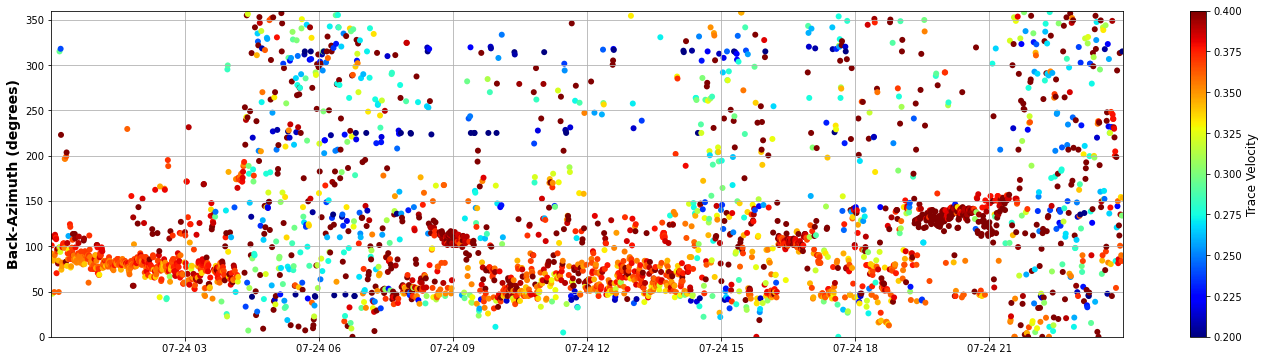

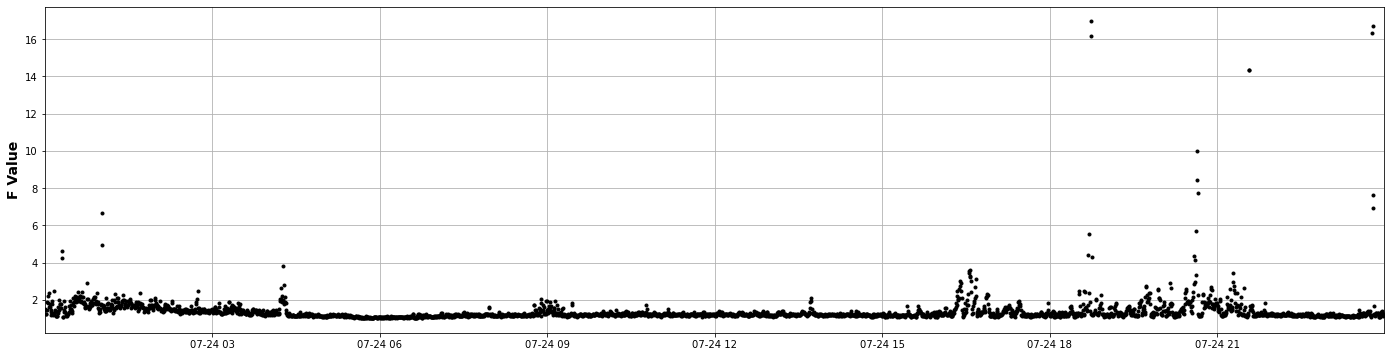

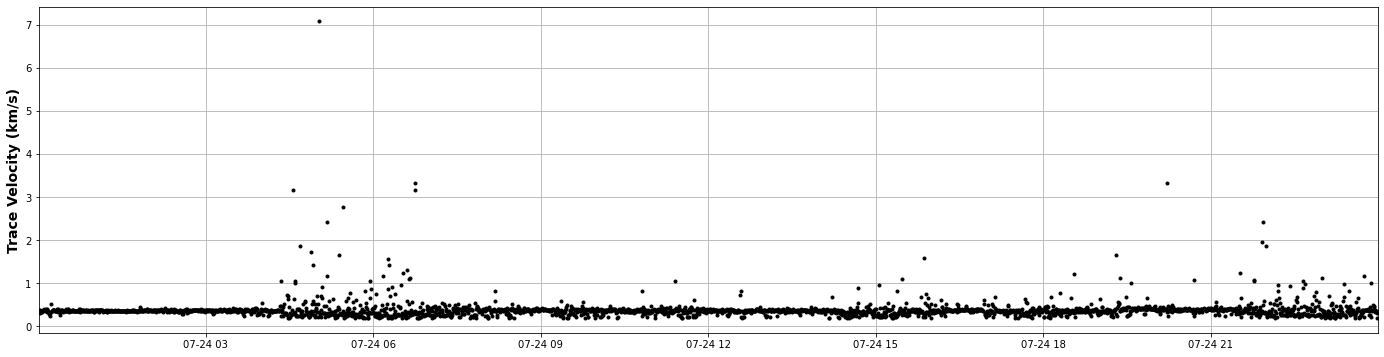

In [1]:
%run ../scripts/plot1_rfk.py -d sqlite:///test_cli.sqlite -a FSU -domain time -f 0 -t fk_res_fsu 

### Save FK results to text file

In [6]:
!print_fk.py -h

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
usage: print_fk.py [-h] -d SQ -a ARRAY [-t FKRESULTS] -f PFK_ID [-s TS]
                   [-e TE] [-o OUTTEXT]

Read fk results for specific array and FK parameter ID

optional arguments:
  -h, --help    show this help message and exit
  -d SQ         name of the database connection, e.g.: -d
                sqlite:///mydb.sqlite
  -a ARRAY      array name, e.g.: -a I37NO
  -t FKRESULTS  specific table with results, e.g.: -t fk_I37
  -f PFK_ID     FK parameter ID to be printed, e.g.: -f 3
  -s TS         starttime, e.g.: -s /'2015-03-02T00:00:00/'
  -e TE         endtime, e.g.: -s /'2015-03-03T00:00:00/'
  -o OUTTEXT    outfile, e.g.: -o res_FILE.txt


In [ ]:
#!print_fk.py -d sqlite:///test.sqlite -a FSU -t fk_res_fsu -f 0 -o fsu_fk.txt

### Print out all FK processing parameters used

In [7]:
!read_pfk.py -h

usage: read_pfk.py [-h] -d SQ

Read combination of parameters used for FK processing

optional arguments:
  -h, --help  show this help message and exit
  -d SQ       name of the database connection, e.g.: -d sqlite:///mydb.sqlite


In [8]:
!read_pfk.py -d sqlite:///test_cli.sqlite

pfkid: 0 domain: time freqmin: 1.0 freqmax: 5.0 window length: 60.0 window step: 30


### Plot PSD of data

In [9]:
!plot_psd_array.py -h

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
usage: plot_psd_array.py [-h] -d SQ -a ARRAY -S TS -E TE [-l WLEN]

calculate PSD for an specific array

optional arguments:
  -h, --help  show this help message and exit
  -d SQ       name of the database connection, e.g.: -d sqlite:///mydb.sqlite
  -a ARRAY    array name, e.g.: -a I37NO
  -S TS       starttime plot, e.g.: -S /'2015-03-02T00:00:00/'
  -E TE       endtime plot, e.g.: -E /'2015-03-03T00:00:00/'
  -l WLEN     subwindow length in seconds, e.g.: -l 100


setting ini time: 2012-07-24T08:50:00.000000Z
setting end time: 2012-07-24T09:20:00.000000Z
setting end time: 2012-07-24T09:20:00.000000Z
SQLITE database
printing all waveform


<IPython.core.display.Javascript object>


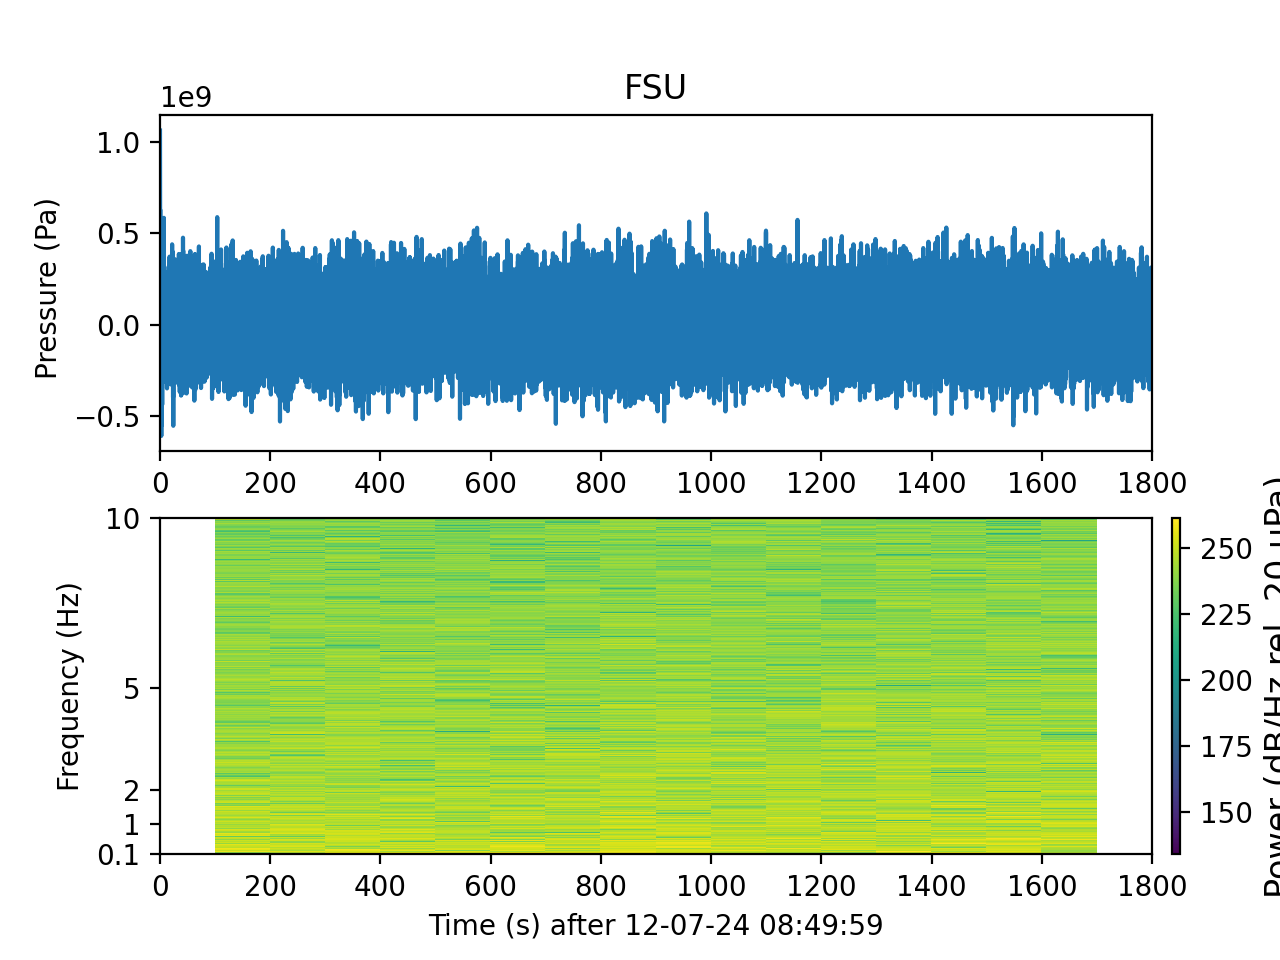

<IPython.core.display.Javascript object>


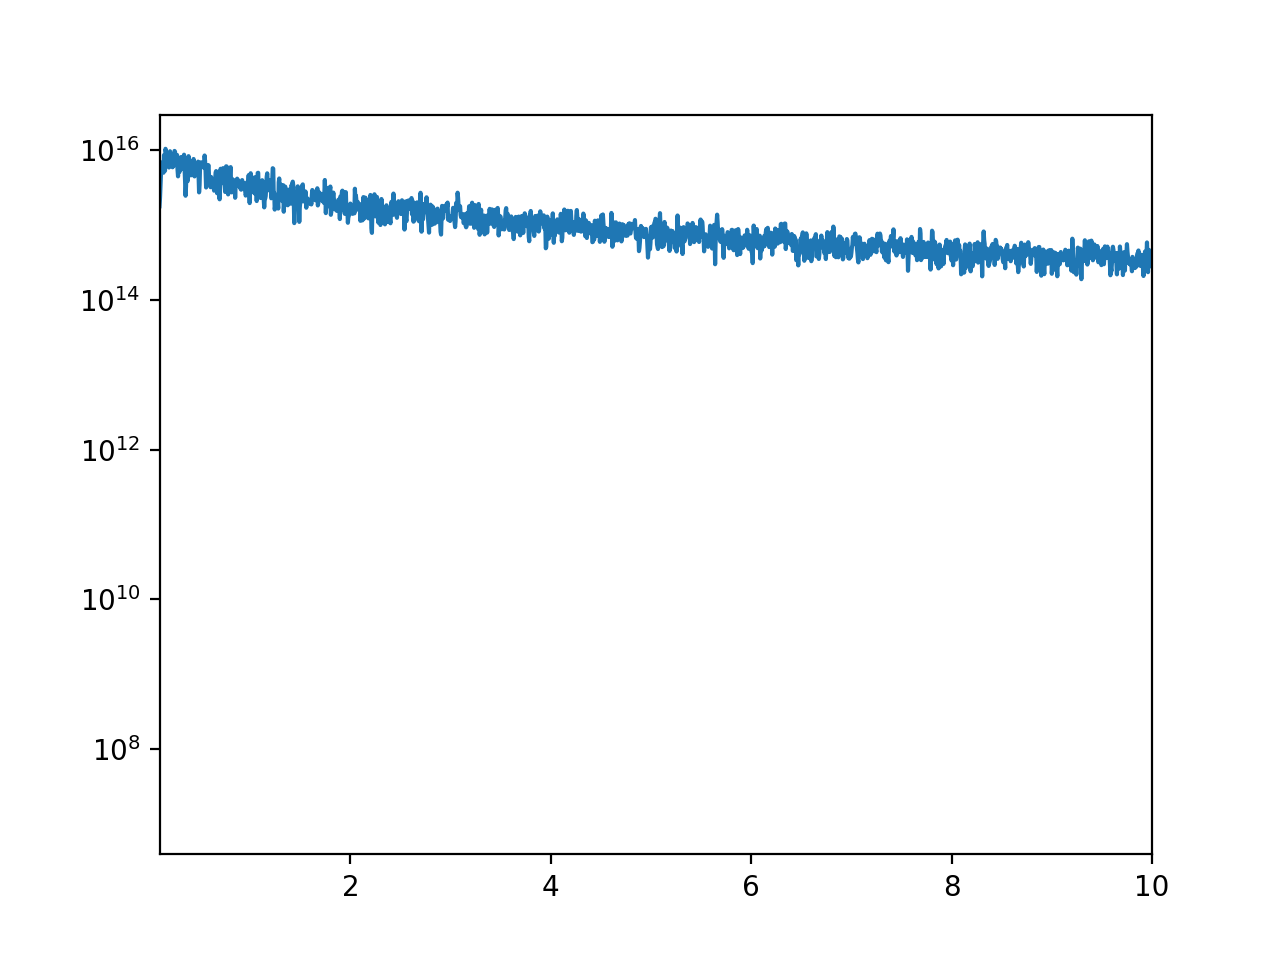

In [10]:
%matplotlib notebook
%run ../scripts/plot_psd_array.py -d sqlite:///test_cli.sqlite -a FSU -S '2012-07-24T08:50:00' -E '2012-07-24T09:20:00' -l 200

## Repeat same processing steps on the other arrays within the network

### Running CLI FK Processing on data from HWU

In [11]:
!infrapy run_fk --config_file config_hwu.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_hwu.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station HWU
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test_cli.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_hwu
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
process already in  fk_params table, pfkid: 0
year: 2012 day: 206
no previous results in t

### Running CLI FK Processing on data from LCM

In [12]:
!infrapy run_fk --config_file config_lcm.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_lcm.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station LCM
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test_cli.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_lcm
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
process already in  fk_params table, pfkid: 0
year: 2012 day: 206
no previous results in t

### Running CLI FK Processing on data from NOQ

In [13]:
!infrapy run_fk --config_file config_noq.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_noq.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station NOQ
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_noq
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
New process parameters, write process to fk_params table pfkid= 0
year: 2012 day: 206
no previ

### Running CLI FK Processing on data from PSU

In [14]:
!infrapy run_fk --config_file config_psu.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_psu.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station PSU
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test_cli.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_psu
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
process already in  fk_params table, pfkid: 0
year: 2012 day: 206
no previous results in t

### Running CLI FK Processing on data from WMU

In [15]:
!infrapy run_fk --config_file config_wmu.txt

//anaconda3/envs/infrapy_test/lib/python3.6/site-packages/obspy/signal/headers.py:93: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ], align=True)
Running fk beamforming with configuration file: 'config_wmu.txt'...

 GENERAL PARAMETERS
year 2012
dayofyearini 206
dayofyearend 208
station WMU
channel EDF
cpucnt 30
domain time

 DB CONNECTION
url sqlite:///test_cli.sqlite
site pisces.tables.css3:Site
wfdisc pisces.tables.css3:Wfdisc
affiliation pisces.tables.css3:Affiliation

 TASK PARAMETERS
name mid band fk test
freqmin 1
freqmax 5.0
beamwinlen 60
beamwinstep 30
algorithm bartlett
fkresults fk_res_wmu
numsources 1
backazmin -180.0
backazmax 180.0
backazstep 1.5
trvelmin 300.0
trvelmax 600.0
trvelstep 2.5
minslowness -3.6
maxslowness 3.6
stepslowness 0.1
Bartlett method was selected
process already in  fk_params table, pfkid: 0
year: 2012 day: 206
no previous results in t